# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset
The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. More details can be found at the [Neurosift link](https://neurosift.app/dandiset/001333).

This dataset, titled **Parkinson's Electrophysiological Signal Dataset (PESD)**, includes signals for both the Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). It focuses on pathological biomarkers observed in Parkinson's Disease.

## Summary of the Notebook Contents
- Load the Dandiset using the DANDI API.
- Load NWB files and view metadata.
- Visualize LFP data from the NWB file.

## Required Packages
The notebook requires the following packages:
- `dandi`
- `pynwb`
- `matplotlib`
- `numpy`
- `remfile`
- `h5py`

## Loading the Dandiset using DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Loading and Exploring the NWB File

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwbfile = io.read()

# Display metadata
print("Session Description:", nwbfile.session_description)
print("Experimenter:", nwbfile.experimenter)
print("Keywords:", nwbfile.keywords[:])

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Experimenter: ('Ananna Biswas',)
Keywords: ['ecephys' 'LFP' "Parkinson's Disease" 'Beta Band']


## Visualizing LFP Data

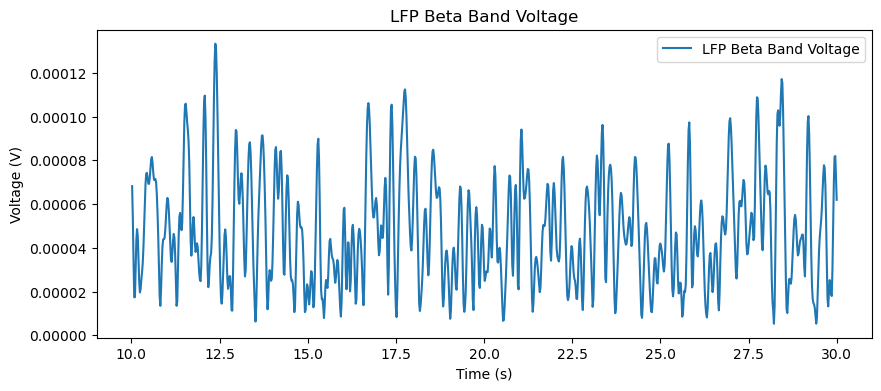

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Extract and visualize LFP data
lfp_data = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data[:]
timestamps = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps[:]

plt.figure(figsize=(10, 4))
plt.plot(timestamps[:1000], lfp_data[:1000], label="LFP Beta Band Voltage")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("LFP Beta Band Voltage")
plt.legend()
plt.show()

## Conclusions and Future Directions

This exploratory analysis provides insights into the LFP Beta Band Voltage from the Parkinson's dataset. Future analyses could further explore the relationship between these signals and Parkinsonian symptoms. Additional advanced visualizations could be constructed using more pieces of data from the dataset.